<a href="https://colab.research.google.com/github/ThakurGumansingh/Cryptocurrency_price_prediction/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# First step, import libraries and then dataset
import numpy as np 
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import Dense
import os 

#print(os.listdir('../input/bitcoin-historical-data'))

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Import the dataset and encode the date
path_to_data = "/content/drive/MyDrive/data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv" 
df = pd.read_csv(path_to_data) 
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()
#print(Real_Price.shape)

In [7]:
# We will predict the prices for 50 days, so splitting the data accordingly
prediction_days = 50
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [8]:
# Some preprocessing, like normalizing the values, reshaping, etc. The data is a time series data, so the output to every instance is the next instance. 
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [18]:
# Initialising
regressor2 = Sequential()

# Adding the GRU layer
regressor2.add(GRU(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the GRU using Adam optimizer and MSE loss
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the GRU to the Training set
regressor2.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50
222/222 [==============================] - 2s 2ms/step - loss: 0.0659
Epoch 2/50
222/222 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 3/50
222/222 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 4/50
222/222 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 5/50
222/222 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 6/50
222/222 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 7/50
222/222 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 8/50
222/222 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 9/50
222/222 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 10/50
222/222 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 11/50
222/222 [==============================] - 0s 2ms/step - loss: 8.8553e-04
Epoch 12/50
222/222 [==============================] - 0s 2ms/step - loss: 4.7384e-04
Epoch 13/50
222/2

In [20]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)

In [21]:
# Prediction from the trained GRU network
predicted_BTC_price = regressor2.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)
er2 = np.mean((predicted_BTC_price-test_set)**2)
print("Mean Square Error (MSE) using GRU:", er2)

Mean Square Error (MSE) using GRU: 45254835.3425576


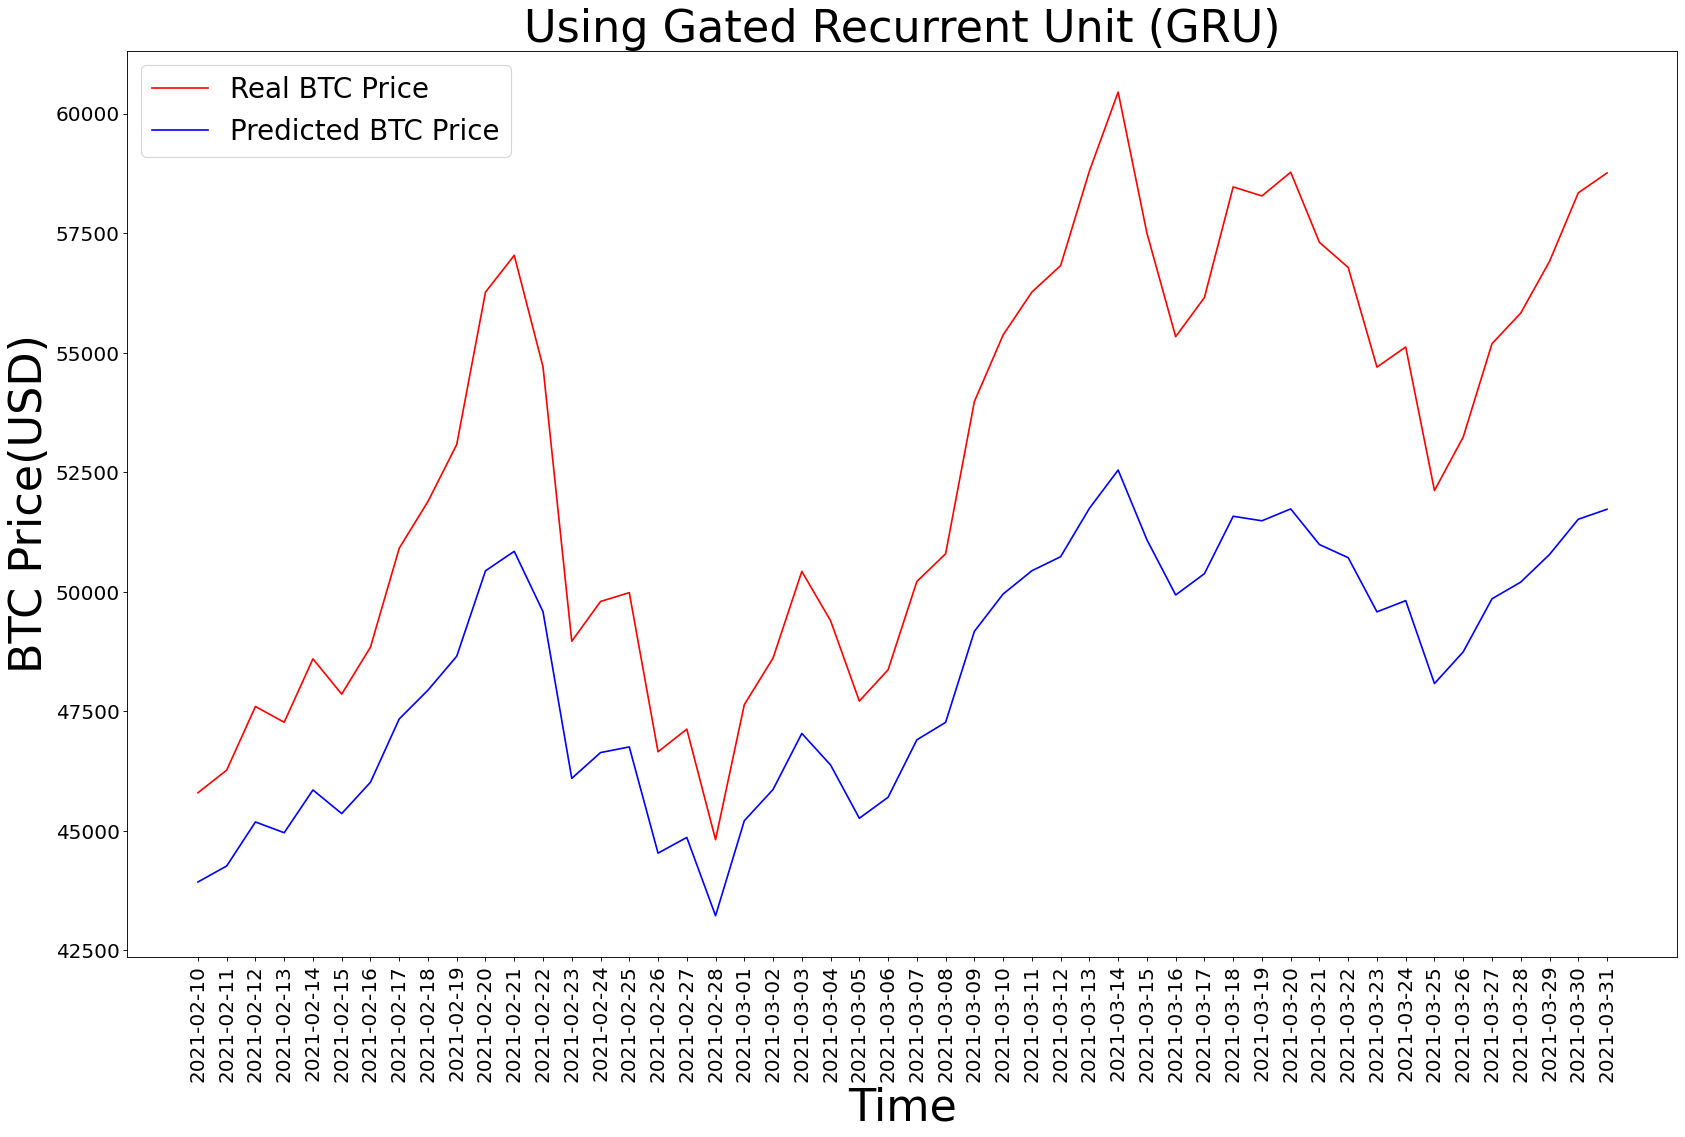

In [22]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('Using Gated Recurrent Unit (GRU)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()